<a href="https://colab.research.google.com/github/AlexBB999/Bridges/blob/master/Bridges_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT EVERYTHING I MAY USE**

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import statistics
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
bridges9 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',encoding='ISO-8859-1',low_memory=False)

**IDENTIFYING FEATURES BY COLUMN NUMBER**

In [0]:
g=list(range(1,137))

In [0]:
z=zip(g,list(bridges9))

In [0]:
list(z)

[(1, 'STATE_CODE_001'),
 (2, 'STRUCTURE_NUMBER_008'),
 (3, 'RECORD_TYPE_005A'),
 (4, 'ROUTE_PREFIX_005B'),
 (5, 'SERVICE_LEVEL_005C'),
 (6, 'ROUTE_NUMBER_005D'),
 (7, 'DIRECTION_005E'),
 (8, 'HIGHWAY_DISTRICT_002'),
 (9, 'COUNTY_CODE_003'),
 (10, 'PLACE_CODE_004'),
 (11, 'FEATURES_DESC_006A'),
 (12, 'CRITICAL_FACILITY_006B'),
 (13, 'FACILITY_CARRIED_007'),
 (14, 'LOCATION_009'),
 (15, 'MIN_VERT_CLR_010'),
 (16, 'KILOPOINT_011'),
 (17, 'BASE_HWY_NETWORK_012'),
 (18, 'LRS_INV_ROUTE_013A'),
 (19, 'SUBROUTE_NO_013B'),
 (20, 'LAT_016'),
 (21, 'LONG_017'),
 (22, 'DETOUR_KILOS_019'),
 (23, 'TOLL_020'),
 (24, 'MAINTENANCE_021'),
 (25, 'OWNER_022'),
 (26, 'FUNCTIONAL_CLASS_026'),
 (27, 'YEAR_BUILT_027'),
 (28, 'TRAFFIC_LANES_ON_028A'),
 (29, 'TRAFFIC_LANES_UND_028B'),
 (30, 'ADT_029'),
 (31, 'YEAR_ADT_030'),
 (32, 'DESIGN_LOAD_031'),
 (33, 'APPR_WIDTH_MT_032'),
 (34, 'MEDIAN_CODE_033'),
 (35, 'DEGREES_SKEW_034'),
 (36, 'STRUCTURE_FLARED_035'),
 (37, 'RAILINGS_036A'),
 (38, 'TRANSITIONS_036B'),


**I HAVE ALREADY DONE SOME FEATURE SELECTION SO I AM NOT USING ALL 136 FEATURES**

In [0]:
bridges99 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',usecols=[1,22,23,26,27,29,31,45,47,48,54,59,66,67,71,72,73,74,75,76,106,107,108,109,114,132],encoding='ISO-8859-1',low_memory=False)

**GET AN OVERVIEW OF YOUR DATA**

In [0]:
bridges99.head(20)

,STRUCTURE_NUMBER_008,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,ADT_029,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SCOUR_CRITICAL_113,SUFFICIENCY_RATING
0,00000000000S702,3,62,1999,2.0,50,5,1,5,5,14.7,9.7,8,8,1,44.2,1,32.4,7,7,2,6,0,1,8,100.0
1,00000000000S703,3,62,2002,2.0,159,5,1,5,1,12.9,9.8,8,8,1,84.2,1,34.6,7,6,2,6,0,8,8,100.0
2,0000000000M0022,3,74,1942,2.0,375,4,1,1,4,18.3,9.0,5,5,2,51.7,2,37.2,5,4,1,1,0,0,8,69.5
3,000000883039900,3,67,1974,2.0,300,5,1,5,5,14.0,10.5,7,7,1,44.2,1,26.6,6,6,1,1,0,0,8,90.2
4,000001014002450,3,67,1937,2.0,6200,4,5,3,10,53.3,7.8,6,6,1,40.0,1,23.9,5,2,1,1,0,0,9,49.9
5,000001331700710,3,67,1924,2.0,3620,3,5,4,3,46.9,8.3,5,5,1,58.4,1,35.0,5,2,1,5,0,0,9,61.3
6,000002,3,2,1898,1.0,400,1,1,3,10,30.5,3.7,7,4,1,2.7,1,1.8,2,2,6,6,0,0,5,16.9
7,000004,3,2,1900,1.0,150,2,1,3,10,25.6,3.7,4,4,5,0.0,5,0.0,0,0,6,8,0,0,U,0.0
8,000004504800350,3,67,1939,2.0,350,4,1,1,4,18.3,8.2,7,7,1,47.7,1,28.8,7,4,1,6,0,0,8,72.8
9,000005,3,4,1900,1.0,15,1,1,4,10,7.9,4.8,5,4,1,4.5,1,2.7,2,6,8,7,0,0,4,22.1


In [0]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615002 entries, 0 to 615001
Data columns (total 26 columns):
STRUCTURE_NUMBER_008       615002 non-null object
TOLL_020                   615002 non-null int64
MAINTENANCE_021            615002 non-null int64
YEAR_BUILT_027             615002 non-null int64
TRAFFIC_LANES_ON_028A      614998 non-null float64
ADT_029                    615002 non-null int64
DESIGN_LOAD_031            615002 non-null object
SERVICE_ON_042A            615002 non-null int64
STRUCTURE_KIND_043A        615002 non-null int64
STRUCTURE_TYPE_043B        615002 non-null int64
MAX_SPAN_LEN_MT_048        615002 non-null float64
DECK_WIDTH_MT_052          614998 non-null float64
DECK_COND_058              615002 non-null object
SUPERSTRUCTURE_COND_059    615002 non-null object
OPR_RATING_METH_063        614951 non-null object
OPERATING_RATING_064       611057 non-null float64
INV_RATING_METH_065        614950 non-null object
INVENTORY_RATING_066       611093 non-null

**THE TARGET IS STRUCTURAL_EVALUATION**

**THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"**

**CREATE NEW FEATURE - MAIN SPAN SURFACE AREA  =MAX_SPAN_LEN_MT_048 X DECK_WIDTH_MT_052**

In [0]:
bridges99['surface_area']=bridges99['MAX_SPAN_LEN_MT_048']*bridges99['DECK_WIDTH_MT_052']

In [0]:
bridges99.head()

,STRUCTURE_NUMBER_008,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,ADT_029,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SCOUR_CRITICAL_113,SUFFICIENCY_RATING,surface_area
0,00000000000S702,3,62,1999,2.0,50,5,1,5,5,14.7,9.7,8,8,1,44.2,1,32.4,7,7,2,6,0,1,8,100.0,142.59
1,00000000000S703,3,62,2002,2.0,159,5,1,5,1,12.9,9.8,8,8,1,84.2,1,34.6,7,6,2,6,0,8,8,100.0,126.42
2,0000000000M0022,3,74,1942,2.0,375,4,1,1,4,18.3,9.0,5,5,2,51.7,2,37.2,5,4,1,1,0,0,8,69.5,164.70
3,000000883039900,3,67,1974,2.0,300,5,1,5,5,14.0,10.5,7,7,1,44.2,1,26.6,6,6,1,1,0,0,8,90.2,147.00
4,000001014002450,3,67,1937,2.0,6200,4,5,3,10,53.3,7.8,6,6,1,40.0,1,23.9,5,2,1,1,0,0,9,49.9,415.74


In [0]:
bridges99['SERVICE_ON_042A'].value_counts()

1    398511
5     45611
Name: SERVICE_ON_042A, dtype: int64

**DROP ADT**

In [0]:
bridges99.drop('ADT_029',axis=1,inplace=True)

**HISTOGRAMS OF NUMERICAL FEATURES**

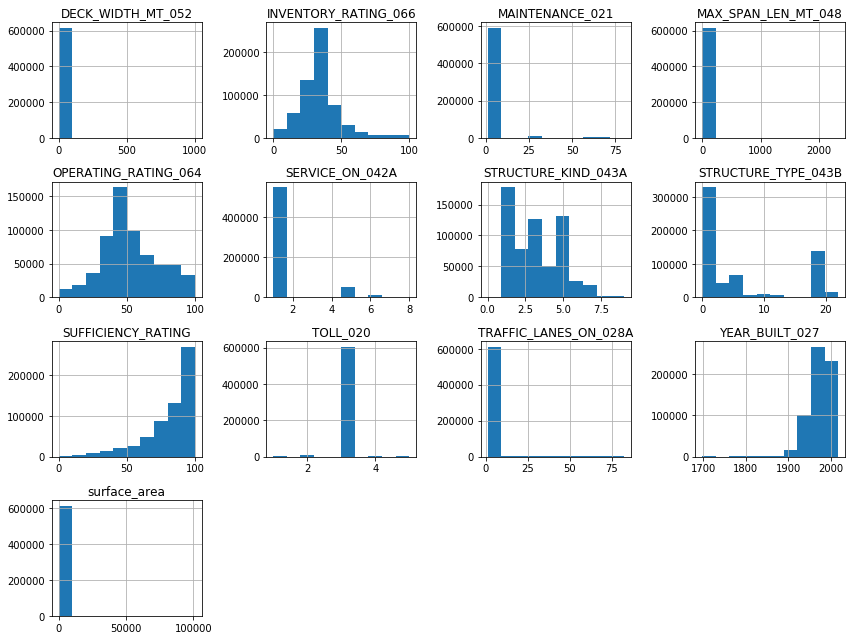

In [0]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

**6.1 METERS IS FEDERAL MINIMUM TO BE A BRIDGE**

**REMOVE BRIDGES LESS THAN 6.1 METERS MAIN SPAN**  (152,926)

In [0]:
bridges99=bridges99[bridges99['MAX_SPAN_LEN_MT_048']>=6.1]

In [0]:
bridges99.shape


(462076, 26)

**REMOVE TOLL ROADS  (7,708)**



In [0]:
bridges99=bridges99[bridges99['TOLL_020']==3]
bridges99.shape

(454368, 26)

In [0]:
bridges99['SERVICE_ON_042A'].value_counts()

1    398511
5     45611
Name: SERVICE_ON_042A, dtype: int64

  **KEEP ONLY BRIDGES THAT ARE HIGHWAY OR HIGHWAY-PEDESTRIAN**  (10,246 dropped)

In [0]:
bridges99=bridges99[bridges99['SERVICE_ON_042A'].isin ([1,5])]

In [0]:
bridges99.shape

(444122, 26)

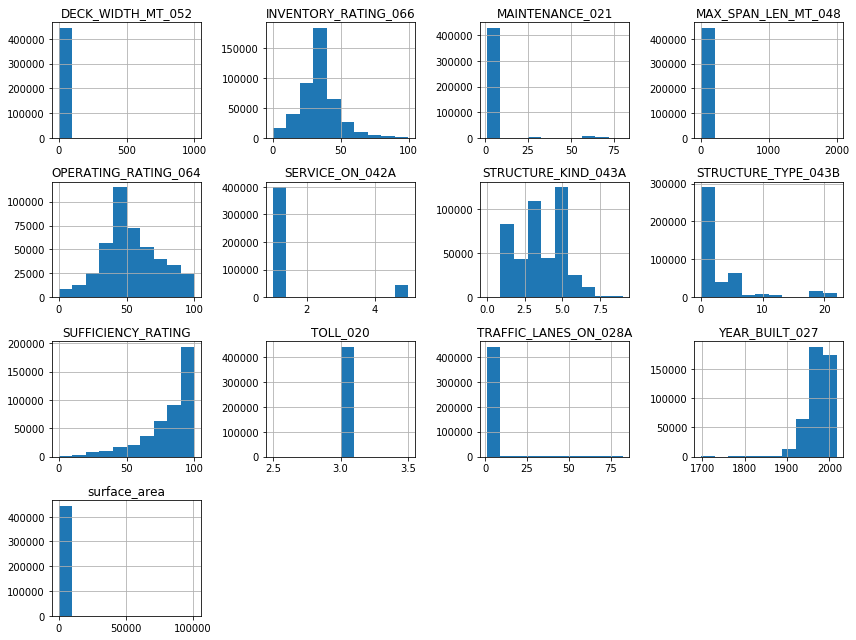

In [0]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

  **CREATING SUBSET OF OBJECT FEATURES**

In [0]:
k=[col for col in list(bridges99) if bridges99[col].dtype!=object]
k

['TOLL_020',
 'MAINTENANCE_021',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'OPERATING_RATING_064',
 'INVENTORY_RATING_066',
 'SUFFICIENCY_RATING',
 'surface_area']

**STILL DOING EDA**

In [0]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts(dropna=False)

2.0     350027
1.0      36760
4.0      23885
3.0      16841
5.0       6087
6.0       5521
8.0       1662
7.0       1404
10.0       688
9.0        517
12.0       256
11.0       221
13.0        90
14.0        76
20.0        32
15.0        15
16.0         9
50.0         5
40.0         5
17.0         4
NaN          3
45.0         2
18.0         2
22.0         2
21.0         1
82.0         1
30.0         1
19.0         1
60.0         1
25.0         1
70.0         1
80.0         1
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [0]:
bridges99.groupby('YEAR_BUILT_027')['YEAR_BUILT_027'].count()

YEAR_BUILT_027
1697       1
1764       1
1765       1
1789       1
1792       2
        ... 
2013    4372
2014    4184
2015    3830
2016    2909
2017     168
Name: YEAR_BUILT_027, Length: 210, dtype: int64

**CHECKING NaN**

In [0]:
bridges99.isna().sum()

STRUCTURE_NUMBER_008          0
TOLL_020                      0
MAINTENANCE_021               0
YEAR_BUILT_027                0
TRAFFIC_LANES_ON_028A         3
ADT_029                       0
DESIGN_LOAD_031               0
SERVICE_ON_042A               0
STRUCTURE_KIND_043A           0
STRUCTURE_TYPE_043B           0
MAX_SPAN_LEN_MT_048           0
DECK_WIDTH_MT_052             0
DECK_COND_058                 0
SUPERSTRUCTURE_COND_059       0
OPR_RATING_METH_063          37
OPERATING_RATING_064       2587
INV_RATING_METH_065          38
INVENTORY_RATING_066       2577
STRUCTURAL_EVAL_067           0
DECK_GEOMETRY_EVAL_068        0
DECK_STRUCTURE_TYPE_107       0
SURFACE_TYPE_108A             1
MEMBRANE_TYPE_108B            1
DECK_PROTECTION_108C          1
SCOUR_CRITICAL_113            0
SUFFICIENCY_RATING            0
dtype: int64